<a href="https://colab.research.google.com/github/sjinang/EE604A_ImageProcessing/blob/master/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Copyright 2020 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
# https://github.com/ee604/ee604_assignments
#
# Author: Shashi Kant Gupta, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

# Task 3: Quantization

In this task, you have to write a simple code to change the [Quantisation](https://www.tutorialspoint.com/dip/concept_of_quantization.htm) level of a given digital image. The default quantisation level for digital images are 8-bits (i.e. 256 levels). We will use two different quantisation methods.

* Uniform
* Lloyd Max

Please refer to the class slides on both methods. For other reference you can follow [this](http://www.cspl.umd.edu/631/631pub06_sec8bcompressBasic.pdf) or [this](https://web.stanford.edu/class/ee398a/handouts/lectures/05-Quantization.pdf)

In [ ]:
%%bash
pip install git+https://github.com/ee604/ee604_plugins

  Cloning https://github.com/ee604/ee604_plugins to /tmp/pip-req-build-4z7ogz74
  Created wheel for ee604-plugins: filename=ee604_plugins-0.1.4-cp36-none-any.whl size=2305 sha256=1fcbc5002567779601b3234015277077256bc4269f57829a0eff01e3518d6b4e
  Stored in directory: /tmp/pip-ephem-wheel-cache-eiu5ni57/wheels/34/a8/1d/ae3b7d209ecde89b4800a47ec55a61e7503bb9548bbb975806
Successfully built ee604-plugins


  Running command git clone -q https://github.com/ee604/ee604_plugins /tmp/pip-req-build-4z7ogz74


In [ ]:
# Importing required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

from ee604_plugins import download_dataset,cv2_imshow

download_dataset(assignment_no=1, task_no=3) # download data for this assignment

Download Complete!


### Task 3.1 Quantisation on Grayscale Image

In [ ]:
def uniform_quantisatioon(img, quantisation_bit=8):
    '''
    Write a program to change the quantisation level of the given image to 2^quantisation_bit levels. 
    In this one you have to use uniform quantisation.
    
    Inputs:                      
    + quantisation_bit - (Must be <= 8)
                       - Consider uniform quantisation with level from [0, 2^quantisation_bit)
                       - For eg. for 8-bit quantisation - There should be 256 different quantisation levels
                       - for 1-bit quantisation - There should be 2 different quantisation levels
                       - Note that range should always be between 0, 255
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8)
    
    Allowed external package:
    + You are free to use np.histogram module or any suitable module which you will need.
    + You must not use any direct implementation.

    '''
    
    #############################
    # Start your code from here #
    #############################
    '''
    FIXING FIRST AND LAST LEVEL TO 0 AND 255 RESPECTIVELY
    TO ENSURE THAT FOR  BIT REPRESENTATION THE IMAGE REMAINS BLACK AND WHITE
    '''
    nL = 2**quantisation_bit
    img = img/(255/(nL-1))
    img = np.round(img)
    img = (img*(255/(nL-1))).astype(np.uint8)
    
    #############################
    # End your code here ########
    #############################    
    
    return img

In [ ]:
def nonuniform_quantisatioon(img, quantisation_bit=8):
    '''
    Write a program to change the quantisation level of the given image to 2^quantisation_bit levels. 
    In this one you have to use Lloyd-Max non-uniform quantisation method.
    
    Inputs:                      
    + quantisation_bit - (Must be <= 8)
                       - Consider uniform quantisation with level from [0, 2^quantisation_bit)
                       - For eg. for 8-bit quantisation - There should be 256 different quantisation levels
                       - for 1-bit quantisation - There should be 2 different quantisation levels i.e. '0' and '255'
                       - Note that range should always between 0, 255
    
    Ouputs:g
    + out_img - numpy array (of dtype np.uint8)
    
    Allowed external package:
    + You are free to use np.histogram module or any suitable module which you will need.
    + You must not use any direct implementation.
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    repL = np.linspace(0,255,2**quantisation_bit)
    if repL.shape[0]>0:
      for N in range(50):
        re_img = (repL[abs(img.flatten()[None,:]-repL[:,None]).argmin(axis=0)]).reshape(img.shape)
        for i in range(repL.shape[0]):
          if np.sum(re_img==repL[i])<1:
            repL[i] = np.random.uniform(0,255)
          else:
            repL[i] = np.mean(img[np.where(re_img==repL[i])])
    
    img = ((repL[abs(img.flatten()[None,:]-repL[:,None]).argmin(axis=0)]).reshape(img.shape)).astype(np.uint8)
    #############################
    # End your code here ########
    #############################    
    
    return img

#### Quantise the given image for following bit-levels = 2, 4, 6, 8 using both the methods. 
Run below cell to plot images in a pyplot table and write your observation on the differences.

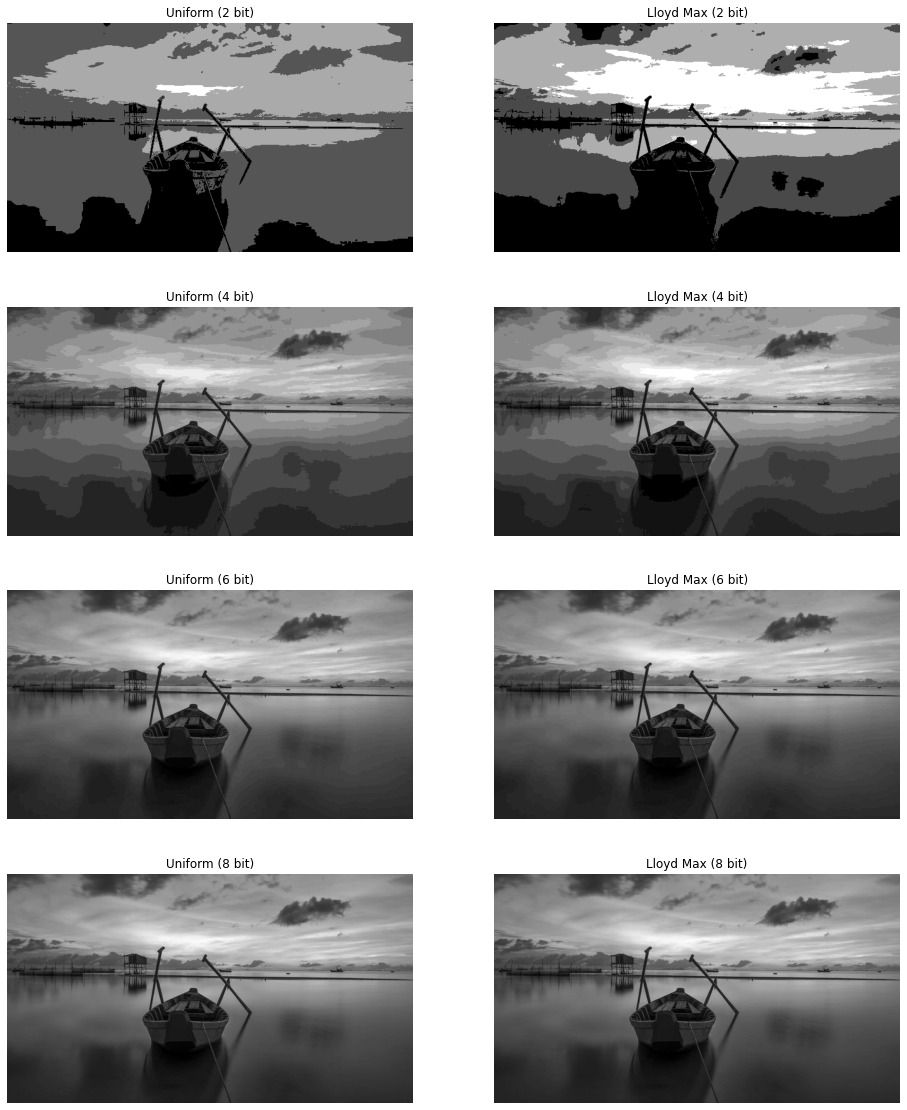

In [ ]:
# Do not change codes inside this cell
# Add your observations in next cell

boat_gray = cv2.imread("data/boat_gray.jpg", 0)

def plot_frame(subplot_id, img, name):
    plt.subplot(4, 2, 1 + int(subplot_id))
    plt.imshow(np.uint8(img), cmap="gray")
    plt.axis("off")
    plt.title(name)
    
plt.figure(figsize=(16, 20))

count = 0
for i in [2, 4, 6, 8]:
    img_uni = uniform_quantisatioon(boat_gray, quantisation_bit=i)
    plot_frame(count, img_uni, "Uniform (" + str(i) + " bit)")
    
    img_lloyd = nonuniform_quantisatioon(boat_gray, quantisation_bit=i)
    plot_frame(count+1, img_lloyd, "Lloyd Max (" + str(i) + " bit)")
    
    count += 2
    
plt.show()

In [ ]:
your_observation = """
Uniform quantizer assumes uniform distribution of data in image, but it's not always the case.
Whereas, Lloyd Max quantizer, tries to find in between distributions, and fit levels accordingly.

In higher resolution (bit>=6), the difference is not significant as we have more levels to be distributed.
and with more levels(resolution) both successfully preserves the information.

for the case of lower resolution (bit<6), the things are a bit different. Here since, uniform doesn't care about
how information is scattered through space, it is not able to extract more information out of image.
On the other hand, even with the handful levels, Lloyd Max finds optimal levels,
such that the way information is scattered can be preserved and be used for optimal quantization.
"""

print(your_observation)


Uniform quantizer assumes uniform distribution of data in image, but it's not always the case.
Whereas, Lloyd Max quantizer, tries to find in between distributions, and fit levels accordingly.

In higher resolution (bit>=6), the difference is not significant as we have more levels to be distributed.
and with more levels(resolution) both successfully preserves the information.

for the case of lower resolution (bit<6), the things are a bit different. Here since, uniform doesn't care about
how information is scattered through space, it is not able to extract more information out of image.
On the other hand, even with the handful levels, Lloyd Max finds optimal levels,
such that the way information is scattered can be preserved and be used for optimal quantization.



### Task 3.2 Quantisation on Colored Images

Use your previous implementation to apply quantisation to each individual channels of colored image "separately".

In [ ]:
def uniform_color_quantisatioon(img, quantisation_bit=8):
    '''
    Write a program to change the quantisation level of the given image to 2^quantisation_bit levels. 
    In this one you have to use uniform quantisation.
    
    Inputs:                      
    + quantisation_bit - (Must be <= 8)
                       - Consider uniform quantisation with level from [0, 2^quantisation_bit)
                       - For eg. for 8-bit quantisation - There should be 256 different quantisation levels
                       - for 1-bit quantisation - There should be 2 different quantisation levels
                       - Note that range should always be between 0, 255
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8)
    
    Allowed external package:
    + You are free to use np.histogram module or any suitable module which you will need.
    + You must not use any direct implementation.
    
    Hint:
    + Use uniform_quantisation() to each channel.
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    img = np.copy(img)
    for i in range(3):
      img[:,:,i] = uniform_quantisatioon(img[:,:,i], quantisation_bit)
    
    #############################
    # End your code here ########
    #############################    
    
    return img

In [ ]:
def nonuniform_color_quantisatioon(img, quantisation_bit=8):
    '''
    Write a program to change the quantisation level of the given image to 2^quantisation_bit levels. 
    In this one you have to use Lloyd-Max non-uniform quantisation method.
    
    Inputs:                      
    + quantisation_bit - (Must be <= 8)
                       - Consider uniform quantisation with level from [0, 2^quantisation_bit)
                       - For eg. for 8-bit quantisation - There should be 256 different quantisation levels
                       - for 1-bit quantisation - There should be 2 different quantisation levels i.e. '0' and '255'
                       - Note that range should always between 0, 255
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8)
    
    Allowed external package:
    + You are free to use np.histogram module or any suitable module which you will need.
    + You must not use any direct implementation.
    
    Hint:
    + Use nonuniform_quantisation() to each channel.
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    img = np.copy(img)
    for i in range(3):
      img[:,:,i] = nonuniform_quantisatioon(img[:,:,i], quantisation_bit)
    
    #############################
    # End your code here ########
    #############################    
    
    return img

#### Quantise the given image for following bit-levels = 2, 4, 6, 8 using both the methods. 
Run below cell to plot images in a pyplot table and write your observation on the differences.

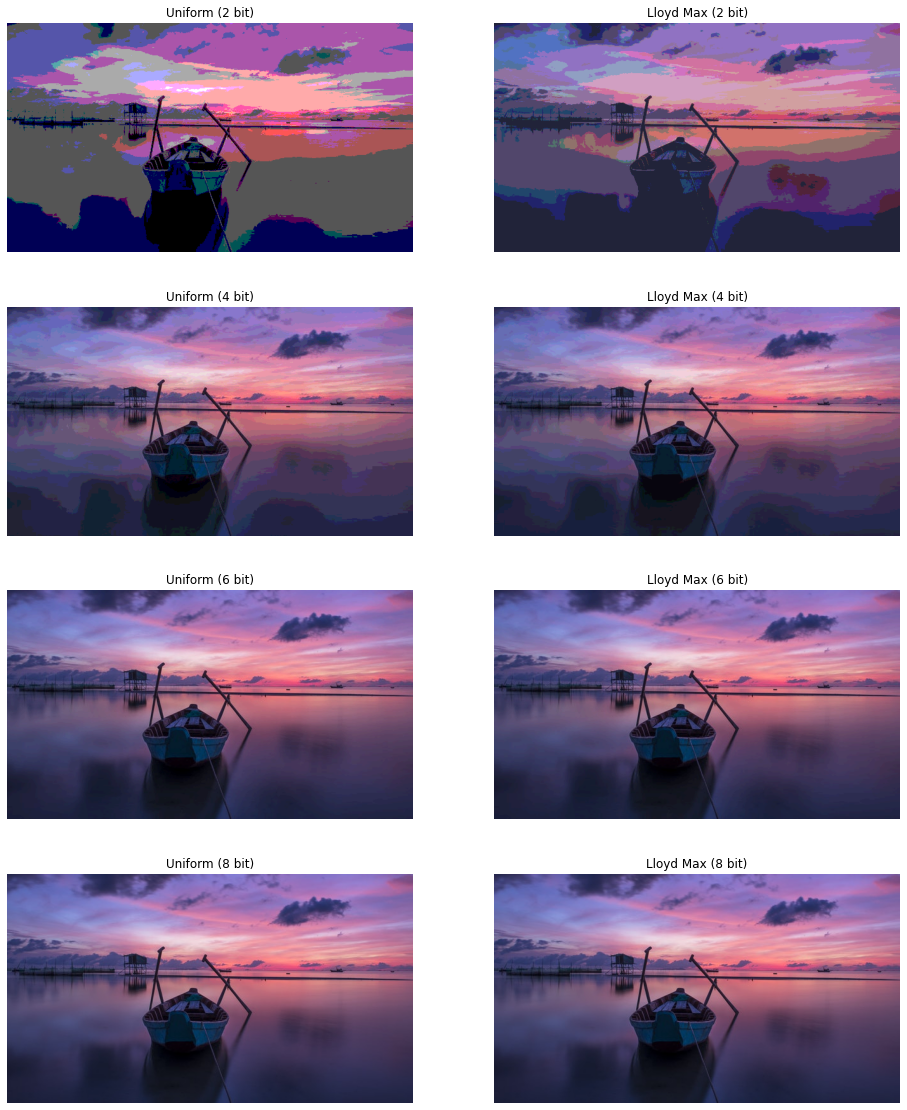

In [ ]:
# Do not change codes inside this cell
# Add your observations in next cell

boat_color = cv2.imread("data/boat.jpg")

def plot_frame(subplot_id, img, name):
    plt.subplot(4, 2, 1 + int(subplot_id))
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")
    plt.title(name)
    
plt.figure(figsize=(16, 20))

count = 0
for i in [2, 4, 6, 8]:
    img_uni = uniform_color_quantisatioon(boat_color, quantisation_bit=i)
    plot_frame(count, img_uni, "Uniform (" + str(i) + " bit)")
    
    img_lloyd = nonuniform_color_quantisatioon(boat_color, quantisation_bit=i)
    plot_frame(count+1, img_lloyd, "Lloyd Max (" + str(i) + " bit)")
    
    count += 2
    
plt.show()

In [ ]:
your_observation = """
I have written my extended and detailed observation above.
And since here too, the same methods have been applied, what I said earlier also remains true here.
Here too, due to more available levels (bit>=6), the difference between two methods is not much to differentiate.
whereas in lower resolutions (bit<6), it is clearly seen how both of them approch this problem differently.
Lloyd Max searches to find optimal levels such that distribution of information can be used to minimize quantization error.
On the other hand Uniform assumes information is scattered uniformly and thus acts accordingly.
"""

print(your_observation)


I have written my extended and detailed observation above.
And since here too, the same methods have been applied, what I said earlier also remains true here.
Here too, due to more available levels (bit>=6), the difference between two methods is not much to differentiate.
whereas in lower resolutions (bit<6), it is clearly seen how both of them approch this problem differently.
Lloyd Max searches to find optimal levels such that distribution of information can be used to minimize quantization error.
On the other hand Uniform assumes information is scattered uniformly and thus acts accordingly.

